Train on 1500 samples, validate on 1500 samples
Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 1.5569 - acc: 0.0873 - val_loss: 1.4913 - val_acc: 0.0840
Epoch 2/20
1500/1500 [==============================] - 1s 467us/step - loss: 1.4534 - acc: 0.1200 - val_loss: 1.3744 - val_acc: 0.3473
Epoch 3/20
1500/1500 [==============================] - 1s 415us/step - loss: 1.3401 - acc: 0.4467 - val_loss: 1.2865 - val_acc: 0.5013
Epoch 4/20
1500/1500 [==============================] - 1s 423us/step - loss: 1.2771 - acc: 0.5000 - val_loss: 1.2602 - val_acc: 0.5007
Epoch 5/20
1500/1500 [==============================] - 1s 454us/step - loss: 1.2540 - acc: 0.5000 - val_loss: 1.2424 - val_acc: 0.5007
Epoch 6/20
1500/1500 [==============================] - 1s 433us/step - loss: 1.2374 - acc: 0.5000 - val_loss: 1.2297 - val_acc: 0.5007
Epoch 7/20
1500/1500 [==============================] - 1s 427us/step - loss: 1.2258 - acc: 0.5000 - val_loss: 1.2216 - val_acc: 0.5007
Ep

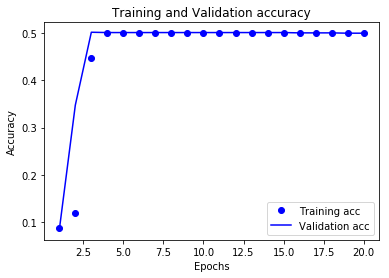

For 20 random moves
Puzzle state: 297451386_ab
For A* using heuristic <function MisplacedTile at 0x7f0397cdc6a8>
Length of Solution 88
Length of Closed list 1435
Length of Open list 1116
<function MisplacedTile at 0x7f0397cdc6a8> (88, 1435, 1116)
For A* using heuristic <function TileRowCol at 0x7f0397cdc730>
Length of Solution 70
Length of Closed list 265
Length of Open list 188
<function TileRowCol at 0x7f0397cdc730> (70, 265, 188)
For A* using heuristic <function Nilson at 0x7f0397cdc950>
Length of Solution 72
Length of Closed list 1267
Length of Open list 991
<function Nilson at 0x7f0397cdc950> (72, 1267, 991)
For A* using NN heuristic
Length of Solution 148
Length of Closed list 1597
Length of Open list 1326
(148, 1597, 1326)
Puzzle state: 1923a58b_674
For A* using heuristic <function MisplacedTile at 0x7f0397cdc6a8>


KeyboardInterrupt: 

In [7]:
# imported modules for neural network
from keras import models
from keras import layers
#from keras.layers import Flatten
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras.layers import Embedding
import matplotlib.pyplot as plt
import numpy as np
from TrainingAgent import *

#The code for training the Neural Network, along with the heuristics implementation comes from
#TrainingAgent

dynamicWeight=3
import heapq
###############################################TESTING AGENT IMPLEMENTATION###################################################
#The Open List is created as a piority queue so the node with the lowest f(n) is always removed when pop() is used
class PriorityQueue:
    
    def __init__(self):
        self._queue = []
        self._index = 0
        self.size=0
 
    def push(self,node):
        heapq.heappush(self._queue, (node.h, self._index, node))
        self._index += 1
        self.size+=1
 
    
    def pop(self):
        self.size-=1
        return heapq.heappop(self._queue)[-1]
    
# Node class that contain a specific puzzle board state, the node's parent,
#the location of the blank in the parent , the current cost f(n) of the node

    
class Node():

    def __init__(self,state,parent=None,lastblankloc=-1,h=0):
        self.parent = parent
        self.state=state
        if(parent==None):
            self.g=0
        else:
            self.g=parent.g+5
        self.h = h
        self.prevblank=lastblankloc
        self.f = self.g+h

# a wally to check if the node has the same state as the other which is a state. 
    def __eq__(self,other):
        return (self.state == other)

# the main function
# for each state in the input file the function tries to solve the puzzle
#using each of the heuristics in hList then the Neural Network heuristic.
#currently it solves n states per file then break
def TestingAgent(file,numofStates):
    hList=[MisplacedTile,TileRowCol,Nilson]
    #LinearCon
    inputf=open(file,"r")
    sd=0
    for state in inputf:
        if (sd==numofStates):
            return
        else:
            state=state.strip('\n')
            size=len(state)-1
            print("Puzzle state: " +state)
            for func in hList:
                print(func,Agent(state,size,func))
            print(AgentNN(state,size,"func"))
            sd+=1


#An A* algorithm that tries to solve a puzzle with the given heuristic func.
def Agent(state,size,func):
    if (size==11):
        goal="123456789ab_"
    if(size==15):
        goal="123456789abcdef_"
    startN=Node(state,None)
    openList=PriorityQueue()
    closedList=[]
    sd=0
    openList.push(startN)
    lastmov=state.index("_")
    #loop
    print("For A* using heuristic",func)
    while (openList.size!=0):
        curNode=openList.pop()
        
        closedList.append(curNode)
        
        #if node is goal
        if(curNode==goal):
            path=[]
            while(curNode.parent!=None):
                path.append(curNode.state)
                curNode = curNode.parent
            
            print("Length of Solution",len(path))
            print("Length of Closed list",len(closedList))
            print("Length of Open list",openList.size)
            return(len(path),len(closedList),openList.size)
        #Generate children nodes instead
        else:
            sd+=1
        
            moves=Moves(curNode.state,size,lastmov)
            lastmov=curNode.state.index("_") 
            children = []
            for move in moves:
                newState=MoveAction(curNode.state,move)
                heur=func(newState,size)
                child=Node(newState,curNode,lastmov,heur)
                children.append(child)
            #print("Parent is: "+ curNode.state)
            for child in children:
                x=1
                for mem in closedList:
                    if (child==mem.state):
                        x=0
                for mem in sorted(openList._queue):
                
                    #print("comparing child: "+child.state+" against "+mem[2].state)
                   # print("Result is: "+ str(child == mem[2].state))
                    if ((child == mem[2].state) and (child.g > mem[2].g)):
                  
                        x=0
                if(x==1):
                    # if child node's state does not already exist in either lists
                    # then add to OpenQueue
                    #these extra commented features help track movement of A during testing
                   # print("Child State: "+ str(child.state))
                    #print("H Cost: "+ str(child.h))
                    #print("child level:  "+ str(sd))
                    openList.push(child)
                #print("child enters: "+ child.state)
                #print("child level:  "+ str(sd))
                #print("Openlist is: "+ str(sorted(openList._queue)))
                #print("Closedlist is: "+  str(closedList))
              
             
                       
                
#An A* algorithm that tries to solve a puzzle with the Neural Network Heuristic.
#Prints out the length of solution, and size of the Open and Closed List if one 
#is found
def AgentNN(state,size,func):
    if (size==11):
        goal="123456789ab_"
    if(size==15):
        goal="123456789abcdef_"
    startN=Node(state,None)
    openList=PriorityQueue()
    closedList=[]
    sd=0
    openList.push(startN)
    lastmov=state.index("_")
    #loop
    print("For A* using NN heuristic")
    while (openList.size!=0):
        curNode=openList.pop()
        closedList.append(curNode)
        #if node is goal
        if(curNode==goal):
            path=[]
            while(curNode.parent!=None):
                path.append(curNode.state)
               
                curNode = curNode.parent
            print("Length of Solution",len(path))
            print("Length of Closed list",len(closedList))
            print("Length of Open list",openList.size)   
            return(len(path),len(closedList),openList.size)
        #Generate children instead
        else:
            #first create a vector heuristics to give the heuristic
            # along with the list of legal moves
            sd+=1         
            moves=Moves(curNode.state,size,lastmov)
            blank=curNode.state.index("_") 
            sub1=MisplacedTile(curNode.state,size)
            sub2=TileRowCol(curNode.state,size)
            sub3=Nilson(curNode.state,size)
            vector=[sub1,sub2,sub3]
            # bestmoves returns a list of legal moves 
            #sorted by the neural network heuristic from most likely to worst candidate 
            bestmoves=NNm(vector,blank,moves)
            lastmov=curNode.state.index("_")
            children = [] 
            # create the child nodes per legal move and assign the heuristic cost h(n)
            # as a result of the neural network heuristic
            for move in bestmoves:
                newState=MoveAction(curNode.state,move)
                heur=((sum(vector))/len(vector))+(dynamicWeight*(bestmoves.index(move)))
                child=Node(newState,curNode,lastmov,heur)
                children.append(child)
            #print("Parent is: "+ curNode.state)
            for child in children:
                x=1
                for mem in closedList:
                    if (child==mem.state):
                        x=0
                for mem in sorted(openList._queue):
                
                    #print("comparing child: "+child.state+" against "+mem[2].state)
                   # print("Result is: "+ str(child == mem[2].state))
                    if ((child == mem[2].state) and (child.g > mem[2].g)):
                  
                        x=0
                if(x==1):
                    
                    openList.push(child)
                 # if child node's state does not already exist in either lists
                # then add to OpenQueue
                #these extra commented features help track movement of A during testing
                #print("child enters: "+ child.state)
                #print("child level:  "+ str(sd))
                #print("Openlist is: "+ str(sorted(openList._queue)))
                #print("Closedlist is: "+  str(closedList))
#     
#Takes a vector of heuristic values for a specific state
#then takes the predicted probabilties of each move being the 
#the expected move as ouputed by the neural network
#then sorts the moves based on these predictions from highest to lowest.
#then removes the illegal moves and returns the sorted moves as a list.
def NNm(vector,blank,moves):
    #print(model.predict(np.array(vector).reshape((1,3))))
    prob=model.predict(np.array(vector).reshape((1,3)))
    probl=list(prob[0])
    p=[probl.index(x) for x in sorted(probl, reverse=True)]
    result=[]
    for label in p:
        if ((label==1)):
            if ((blank-1) in moves):
                result.append((blank-1))
                
        if ((label==3)):
            if ((blank+1) in moves):
                result.append((blank+1))
             
        if ((label==2)):
            if ((blank-4) in moves):
                result.append((blank-4))
         
        if ((label==0)):
            if ((blank+4) in moves):
                result.append((blank+4))

    return (result)    
            
            
            
        
    
#Function that takes the input board state, 
#the location of blank in a previous state before the move that generated this state
# then returns a list of posible indexs or tile postions the blank can move to.  
# yet also prevent the move that undo's the last move from being part of the list
#ie go left in previous state then right in this state
    
def Moves(state,size,lastLoc):
    moves=[]
    blank=state.index("_")
    if(size==11):
        #if blank can move right then get the tuple for that move
        #maybe change to even number with division
        if(((blank+1)!=4) and ((blank+1)!=8) and ((blank+1)!=12)):
            #moves.append((blank,state[blank+1]))
            moves.append(blank+1)
        #if the blank can move left get the tuple for that move
        if(((blank-1)!=-1) and ((blank-1)!=3)and((blank-1)!=7)):
            #moves.append((blank,state[blank-1])) 
            moves.append(blank-1)
        #if the blank can move up then get the tuple for that move
        if((blank)>=4):
            #moves.append((blank,state[blank-4]))
            moves.append(blank-4)
        #if the blank can move down then get tuple for that move
        if((blank)<8):
           #moves.append((blank,state[blank+4]))
           moves.append(blank+4)
        if(lastLoc in moves):
            moves.remove(lastLoc)
        return moves       
    
#Output the resulting new state generated from an input state and move   
def MoveAction(state,move):
    newstate=list(state)
    blank=newstate.index("_")
    newstate[blank],newstate[move]=newstate[move],newstate[blank]
    return "".join(newstate)

#print the current board
def Board(state):
    if (len(state)==12):
        print(state[0:4])
        print (state[4:8])
        print (state[8:12])
    if (len(state)==16):
        print(state[0:4])
        print (state[4:8])
        print (state[8:12])
        print (state[12:16])
 


 ####################################NEURAL NETWORK IMPLEMENTATION FOR NEURAL NETWORK HEURISTIC###############################
#Index for moves [0 1 2 3] with 2-Up,0-Down,1-Left,3-Right

#The training and evaluation for the neural network is here





#Creates a new Numppty Array from the file to be used
#to train the neural network
def toArray(output1):
    output11=open(output1,"r")
    out=[x.strip() for x in output11.readlines()]
    out=[x.strip('][').split(',')for x in out]
    out=[list(map(int, x)) for x in out ]
    return np.array(out)


#Creates a array of labels that can be catagorized 
#to make them ready for the Neural Network

def labels(array):
    out=[x[0] for x in array]
    return np.asarray(out).astype('float32')







############################################################################################################################
#After running the Heuristics function for the given file 
#The  newly created 11DataSets and 11Labels will be used to train 
#the Neural Network
#The results of the training will be displayed on screen then
#once TestingAgent is called the results of A* solving a file with
#each heuristic will displayed if a solution is found.




Heuristics("11puzzles.txt",11)

#Enter the name of the file with the training data and  


eleven_output=toArray("11DataSet.txt")
#fifteen_output=toArray("15DataSet.txt")
#fifteen_label=to_categorical(labels(toArray("15DataLabel.txt")))
eleven_label=to_categorical(labels(toArray("11DataLabel.txt")))

#print((fifteen_output[0]))
#print(len(fifteen_label))
#print(eleven_output.dtype)
#print(eleven_label)
#print(eleven_label.shape)

el_val=eleven_output[0:1500]
elp_val=eleven_output[1500:]
el_lab=eleven_label[0:1500]
elp_lab=eleven_label[1500:]

#Copied from disfferent source
"""The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

    input_dim: This is the size of the vocabulary in the text data. For example
    , if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
    output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
    input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.
e = Embedding(200, 32, input_length=50)
1
	
e = Embedding(200, 32, input_length=50)
model=models.Sequential()"""

#Since each state is distinct like words in a dictionary we can use the Embeding layer.
#The values in the vectors are of range 0-120 so the size is 121
##################################################NNEURAL NETWORK ARCHITECTURE################################################

model=models.Sequential()
model.add(layers.Embedding(121,1500,input_length=3))
model.add(layers.LSTM(24))
#model.add(layers.LSTM(1500,return_sequences=True))
#model.add(layers.GRU(1500))

#model.add(layers.Flatten())
#exponential-511333333492279
             #'hard_sigmoid'-0.5193333331743876,0.520666666507721
#sigmoid
model.add(layers.Dense(8,activation='hard_sigmoid'))
model.add(layers.Dense(4,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(el_val,el_lab,epochs=20,batch_size=500,validation_data=(elp_val,elp_lab))
print("When tested on the remaining half of the training data the accuracy was", model.evaluate(elp_val,elp_lab)[1])

#Prints a 
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print("For 5 random moves")
TestingAgent("11final5.txt",5)
print("For 20 random moves")
TestingAgent("11final20.txt",5)
#print("For 40 random moves")
#TestingAgent("11final40.txt")
#print("For 42 random moves")
#TestingAgent("11final42.txt")
#print("For 45 random moves")
#TestingAgent("11final45.txt")
#print("For 30 random moves")
#TestingAgent("11final30.txt")


#AgentNN("1_24673859ab",11,"func")
#AgentNN("_14b623957a8",11,"func")
#Agent("1_24673859ab",11,LinearCon)
#LinearCon("1_24673859ab",11)